In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
# Initialize SIMBAD
simbad = Simbad()
simbad.ROW_LIMIT = -1
simbad.add_votable_fields( "plx_value", "V", "I", "J", "H", "K","G", "pmdec", "pmra", "hpx", "otype")

# Define coordinates (random)
coordinates = SkyCoord(135.9, -65.3, unit=("deg", "deg"))

# Query region
result = simbad.query_region(coordinates, radius="80d0m",
                             criteria="otype = 'Ma*..' OR otype = 'MS*..' OR otype = 'Y*O..' OR otype = 'Ev*..' OR otype = '**..' ")

print(result)
preresult = np.array(result)

          main_id                    ra         ...   pmra   otype
                                    deg         ... mas / yr      
---------------------------- ------------------ ... -------- -----
                   HD  89205 153.77614408634466 ...    23.82    **
        OGLE SMC106.6  21797 14.467708333333334 ...       --   EB*
            UCAC4 276-214163        317.4141433 ...     -4.1    **
       CRTS J182214.8-540825 275.56161211834916 ...   -4.005   RR*
Gaia DR3 6652725606444204800  275.5616105570904 ...   -6.463   RR*
       CRTS J143012.9-082355 217.55391979307998 ...   -1.085   RR*
                   HD 133918 227.69613669405996 ...  -10.899    **
        OGLE BLG-RRLYR-14292    272.12152392047 ...   -7.286   RR*
Gaia DR2 5213068438726194944    117.93527581042 ...    0.603   RR*
                         ...                ... ...      ...   ...
                   HD  31768     74.60916552643 ...   83.993    **
Gaia DR2 5507211404296051712    111.43099725791 ...   -1.303  

In [49]:
filtered_result = result["main_id", "ra", "dec", "plx_value", "V", "I", "J", "H", "K","G", "pmdec", "pmra", "hpx", "otype"]

# Convert result to a Pandas DataFrame
result_df = filtered_result.to_pandas()

# Remove rows with any NULL values
filtered_result = result_df.dropna()

# Display the filtered result
print(filtered_result)

#Save as np array
Withbinaries = filtered_result.to_numpy()

np.save("Withbinaries", Withbinaries)


                                  main_id          ra        dec  plx_value  \
24                            CD-38 10980  245.890992 -39.229489    77.4545   
40                2MASS J05385038-0226477   84.709919  -2.446588     2.5374   
67                            CD-25  5229  118.422536 -26.216448     1.1407   
72                        UCAC2  20534548   23.444080 -27.460383     0.3106   
98                     OGLE BLG-LPV-38562  266.809556 -37.457249     0.0608   
...                                   ...         ...        ...        ...   
1643419  Cl* Trumpler   20    PMF    6161  190.004578 -60.527652     0.2784   
1643420  Cl* Trumpler   20    PMF    4912  190.009656 -60.583496     0.2555   
1643431                         HD 123225  211.897087 -48.330112     1.4015   
1643435                       V* V561 Car  161.248415 -65.038632     6.4661   
1643448                       V* V660 Pup  111.611259 -47.674033     0.2282   

                 V       I       J       H       K 

In [50]:
# Load the data
Withbinaries = np.load("Withbinaries.npy", allow_pickle=True)

# Split the data into features and labels
X = Withbinaries[:, 1:-1]  # All columns except the last one
y = Withbinaries[:, -1]   # The last column
ypreencode = y
# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(40, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(len(np.unique(ypreencode)), activation='softmax')  # len(np.unique(ypreencode)) is number of output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Save the model
model.save("star_classifier_withbin.keras")

Epoch 1/50
1529/1529 [==============================] - 3s 1ms/step - loss: 0.9198 - accuracy: 0.7466 - val_loss: 0.7594 - val_accuracy: 0.7699
Epoch 2/50
1529/1529 [==============================] - 2s 1ms/step - loss: 0.6872 - accuracy: 0.7920 - val_loss: 0.6748 - val_accuracy: 0.7978
Epoch 3/50
1529/1529 [==============================] - 2s 1ms/step - loss: 0.6351 - accuracy: 0.8071 - val_loss: 0.6544 - val_accuracy: 0.8035
Epoch 4/50
1529/1529 [==============================] - 2s 1ms/step - loss: 0.5997 - accuracy: 0.8184 - val_loss: 0.6392 - val_accuracy: 0.8022
Epoch 5/50
1529/1529 [==============================] - 2s 1ms/step - loss: 0.5753 - accuracy: 0.8237 - val_loss: 0.6380 - val_accuracy: 0.8058
Epoch 6/50
1529/1529 [==============================] - 2s 1ms/step - loss: 0.5553 - accuracy: 0.8303 - val_loss: 0.5657 - val_accuracy: 0.8295
Epoch 7/50
1529/1529 [==============================] - 2s 1ms/step - loss: 0.5384 - accuracy: 0.8337 - val_loss: 0.5580 - val_accuracy:

In [51]:
# Load the model
model = tf.keras.models.load_model("star_classifier_withbin.keras")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the predicted one-hot encoded labels back to their original form
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compare the predicted labels with the actual labels
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

638/638 [==============================] - 0s 587us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.07      0.13       109
           1       0.93      0.11      0.20       123
           2       0.00      0.00      0.00        10
           3       0.60      0.43      0.50         7
           4       0.06      0.05      0.05        21
           5       0.40      0.68      0.50        25
           6       0.78      0.75      0.77       626
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         6
           9       0.60      0.52      0.56       630
          10       0.58      0.16      0.26        67
          11       0.60      0.62      0.61        45
          12       1.00      0.70      0.82        23
          13       0.00      0.00      0.00         5
          14       0.93      0.97      0.95     10855
          17       0.95      0.89      0.92      2775
 

C:\Users\jcwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jcwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jcwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

638/638 [==============================] - 0s 645us/step


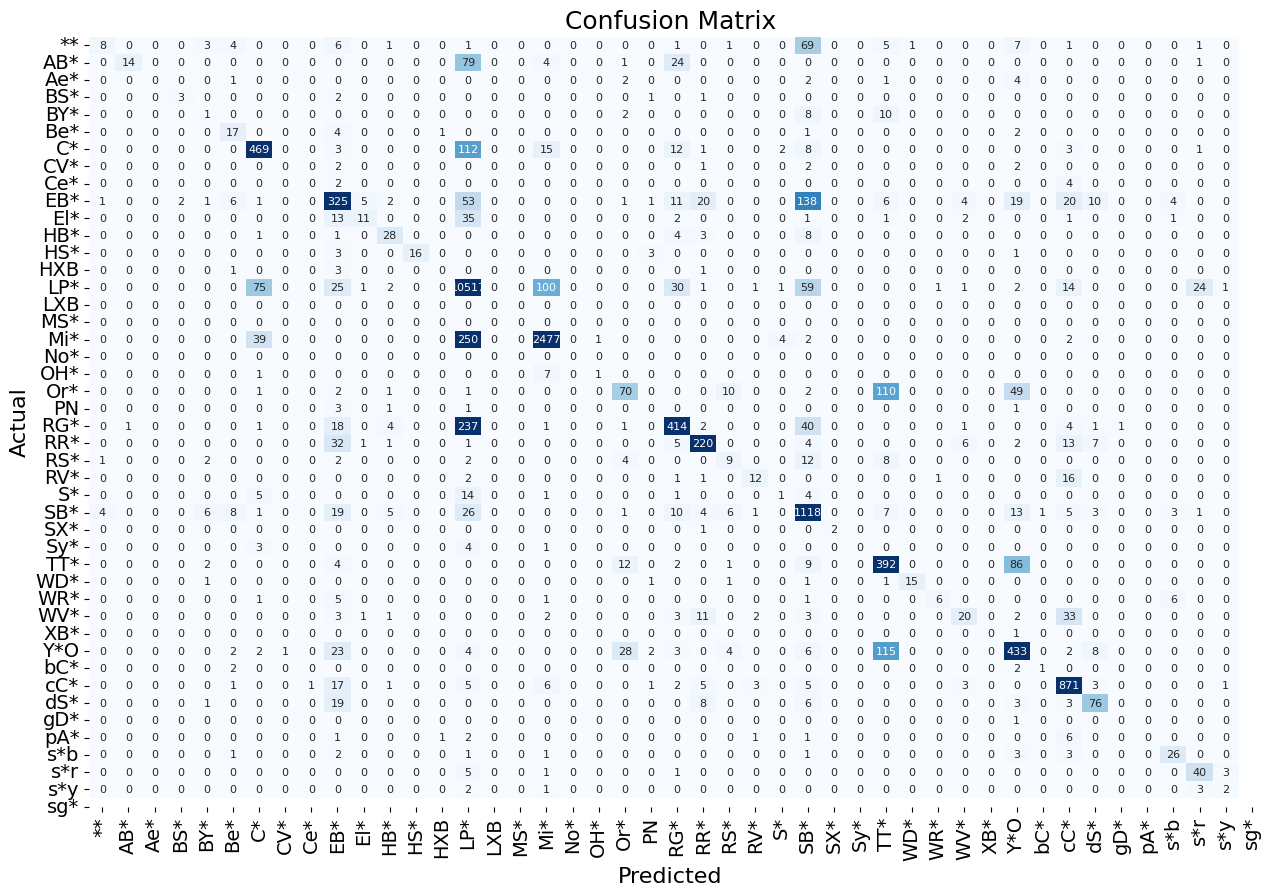

In [52]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Plot confusion matrix with larger size and label names
label_names = np.unique(ypreencode)
plt.figure(figsize=(15, 10))  # Set the figure size
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes, labels=np.arange(44))
sns.heatmap(conf_matrix, annot=True, fmt='d', vmin=0, vmax=200, cmap='Blues', cbar=False, annot_kws={"size": 8},
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Confusion Matrix Take 1')
plt.show()

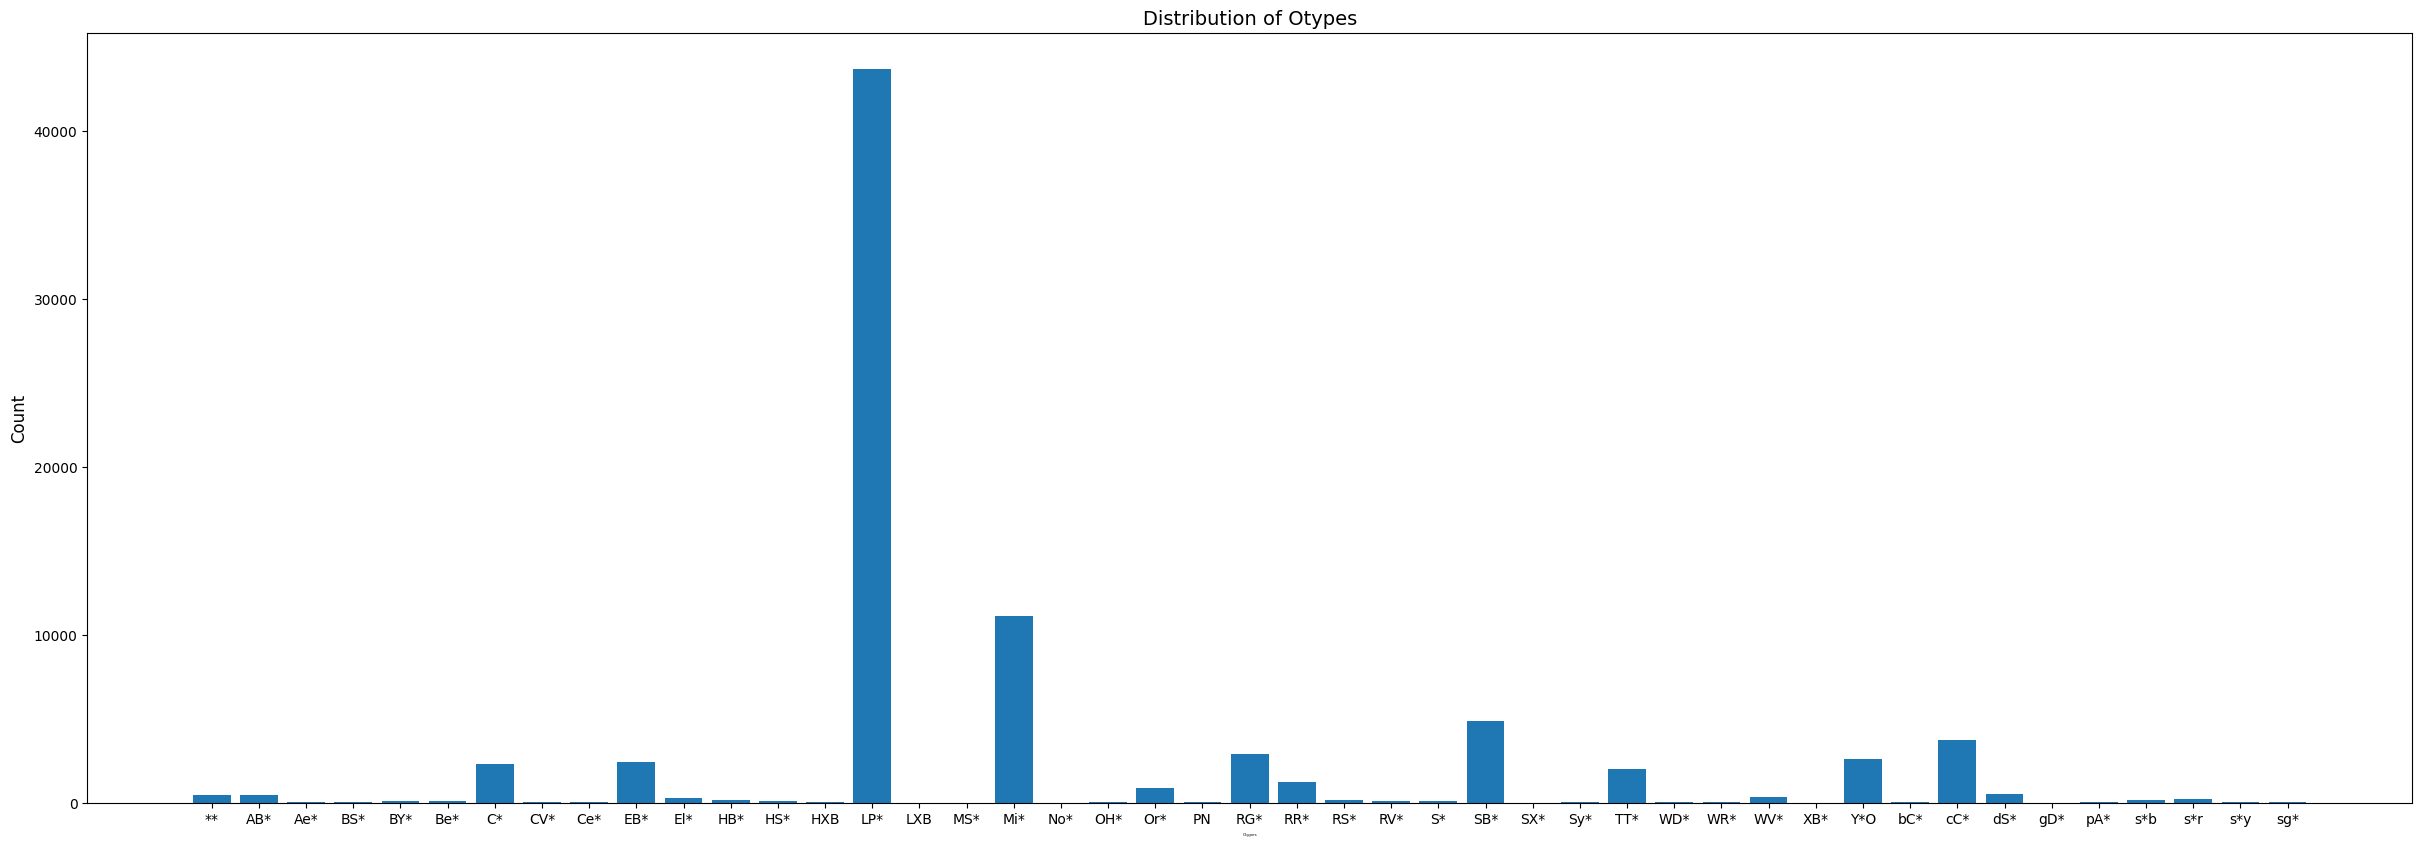

In [53]:
# Get the unique "otypes" values and their counts
otypes, counts = np.unique(Withbinaries[:, -1], return_counts=True)

# Plot the distribution
plt.figure(figsize=(30, 10))  # Increase plot size
plt.bar(otypes, counts)
plt.xlabel("Otypes", fontsize=3)  # Reduce x-axis label font size
plt.ylabel("Count", fontsize=12)  # Reduce y-axis label font size
plt.title("Distribution of Otypes", fontsize=14)  # Increase title font size
plt.xticks(fontsize=10)  # Reduce x-axis tick label font size
plt.yticks(fontsize=10)  # Reduce y-axis tick label font size
plt.show()

['**' 'AB*' 'Ae*' 'BS*' 'BY*' 'Be*' 'C*' 'CV*' 'Ce*' 'EB*' 'El*' 'HB*'
 'HS*' 'HXB' 'LP*' 'LXB' 'MS*' 'Mi*' 'No*' 'OH*' 'Or*' 'PN' 'RG*' 'RR*'
 'RS*' 'RV*' 'S*' 'SB*' 'SX*' 'Sy*' 'TT*' 'WD*' 'WR*' 'WV*' 'XB*' 'Y*O'
 'bC*' 'cC*' 'dS*' 'gD*' 'pA*' 's*b' 's*r' 's*y' 'sg*']
[  445   484    27    34   111   115  2322    17    33  2427   308   183
    79    35 43675     1     2 11119     4    29   895    33  2911  1212
   164   111    87  4866     8    22  1996    71    65   333     2  2605
    23  3710   522     9    20   147   208    48    27]
['Ae*' 'BS*' 'CV*' 'Ce*' 'HS*' 'HXB' 'LXB' 'MS*' 'No*' 'OH*' 'PN' 'S*'
 'SX*' 'Sy*' 'WD*' 'WR*' 'XB*' 'bC*' 'gD*' 'pA*' 's*y' 'sg*']


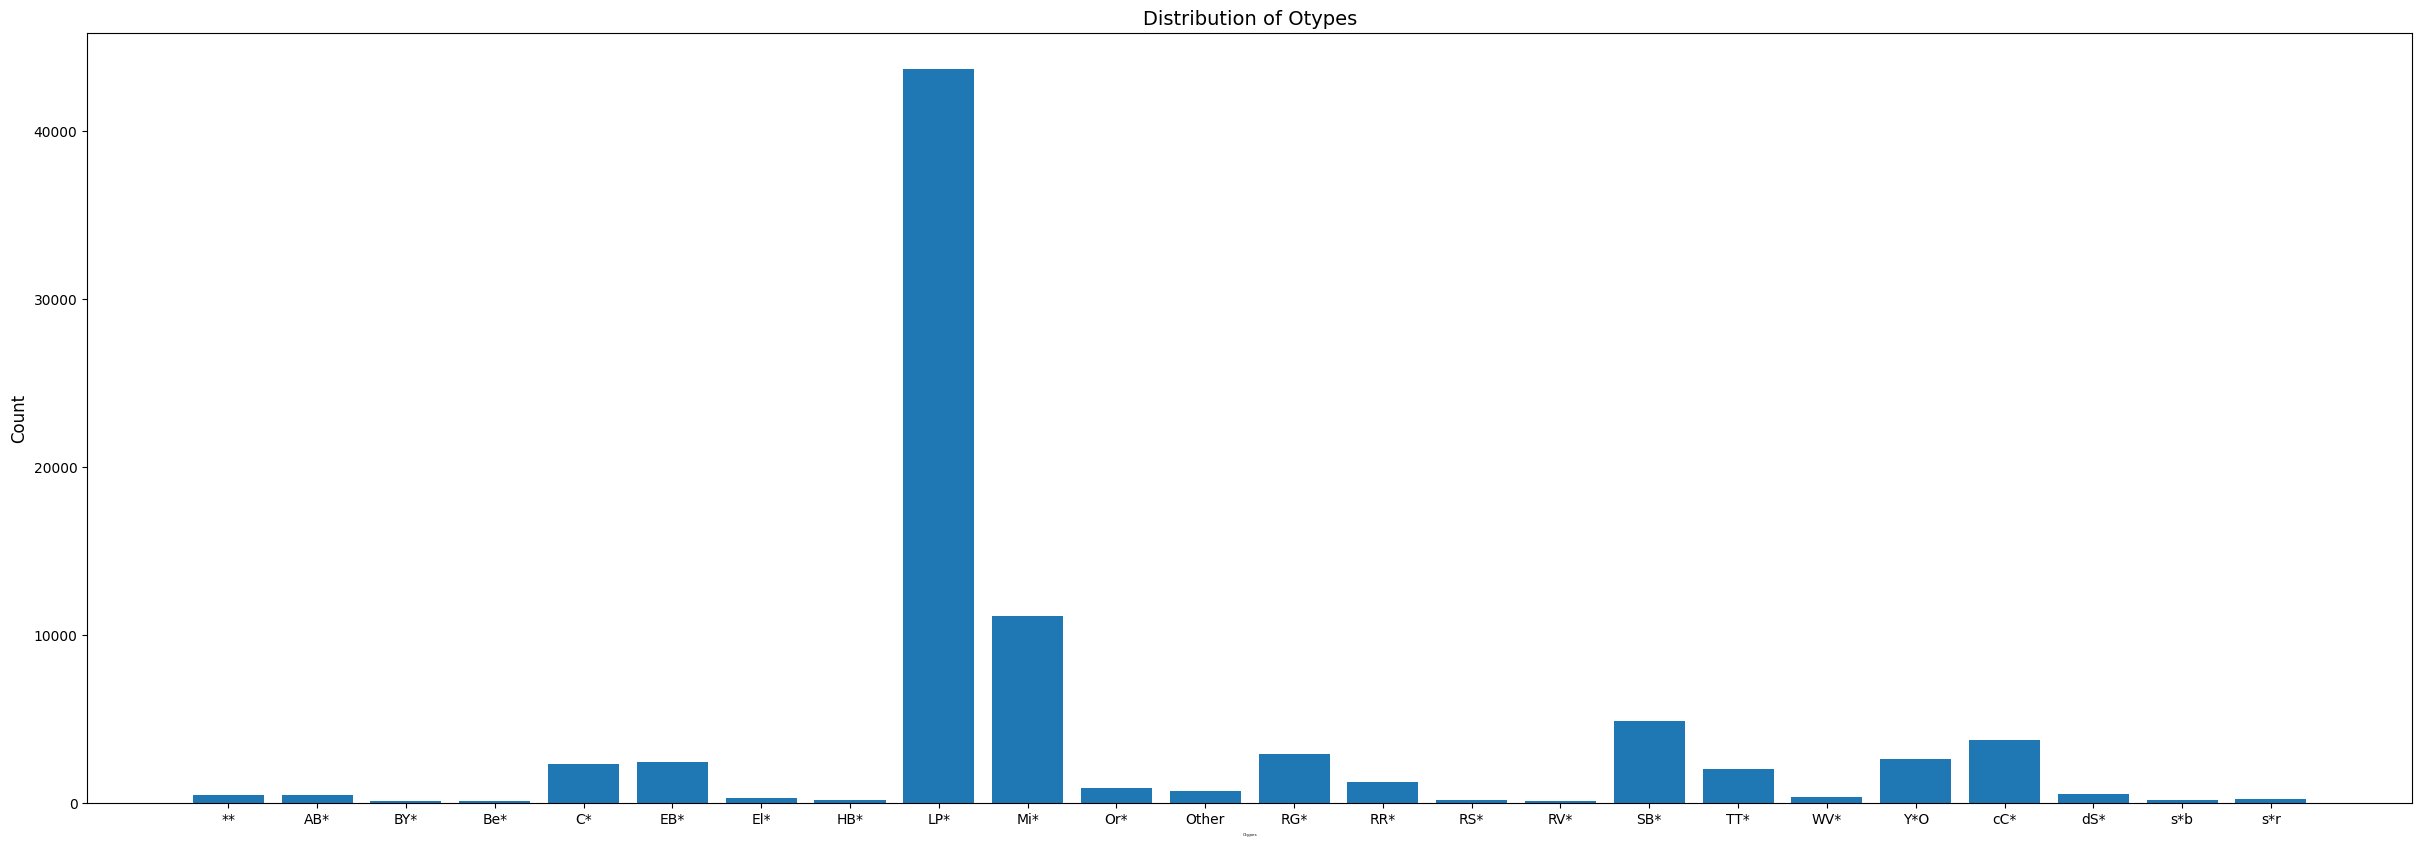

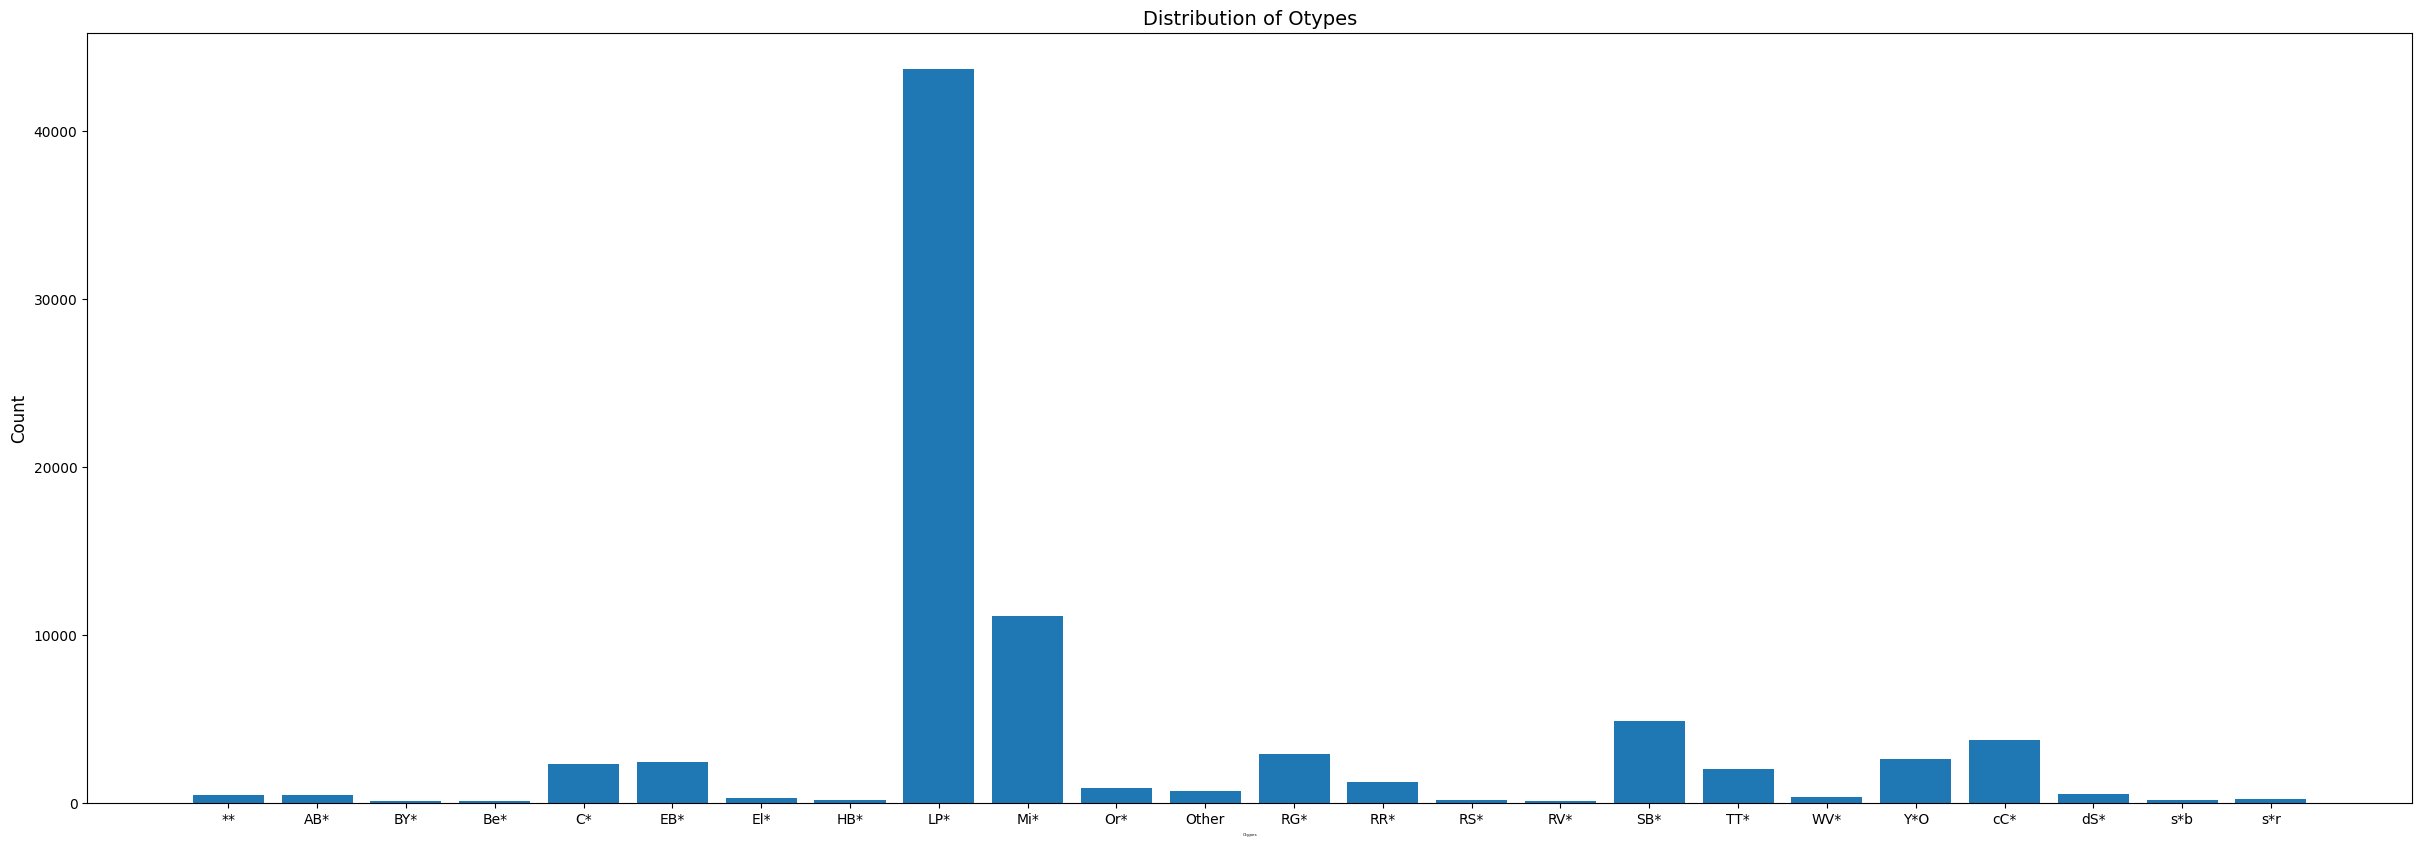

In [54]:
print(otypes)
print(counts)

print(otypes[counts<mincounts])

# min count of a specific otype
mincounts = 100

# Get the unique "otypes" values and their counts
otypes, counts = np.unique(Withbinaries[:, -1], return_counts=True)

if len(otypes[counts<mincounts]) > 0:
    # Replace the rare "otype" values with "Other"
    Withbinaries[:, -1] = np.where(np.isin(Withbinaries[:, -1], otypes[counts<mincounts]), "Other", Withbinaries[:, -1])

    # Get the unique "otypes" values and their counts
    otypes, counts = np.unique(Withbinaries[:, -1], return_counts=True)

    # Plot the distribution
    plt.figure(figsize=(30, 10))  # Increase plot size
    plt.bar(otypes, counts)
    plt.xlabel("Otypes", fontsize=3)  # Reduce x-axis label font size
    plt.ylabel("Count", fontsize=12)  # Reduce y-axis label font size
    plt.title("Distribution of Otypes", fontsize=14)  # Increase title font size
    plt.xticks(fontsize=10)  # Reduce x-axis tick label font size
    plt.yticks(fontsize=10)  # Reduce y-axis tick label font size
    plt.show()

plt.figure(figsize=(30, 10))  # Increase plot size
plt.bar(otypes, counts)
plt.xlabel("Otypes", fontsize=3)  # Reduce x-axis label font size
plt.ylabel("Count", fontsize=12)  # Reduce y-axis label font size
plt.title("Distribution of Otypes", fontsize=14)  # Increase title font size
plt.xticks(fontsize=10)  # Reduce x-axis tick label font size
plt.yticks(fontsize=10)  # Reduce y-axis tick label font size
plt.show()

In [55]:
def makerareother(df, otypes, counts, mincounts):
    if len(otypes[counts<mincounts]) > 0:
        # Replace the rare "otype" values with "Other"
        df[:, -1] = np.where(np.isin(df[:, -1], otypes[counts<mincounts]), "Other", df[:, -1])

        # Get the unique "otypes" values and their counts
        otypes, counts = np.unique(df[:, -1], return_counts=True)

        # Plot the distribution
        plt.figure(figsize=(30, 10))  # Increase plot size
        plt.bar(otypes, counts)
        plt.xlabel("Otypes", fontsize=3)  # Reduce x-axis label font size
        plt.ylabel("Count", fontsize=12)  # Reduce y-axis label font size
        plt.title("Distribution of Otypes", fontsize=14)  # Increase title font size
        plt.xticks(fontsize=10)  # Reduce x-axis tick label font size
        plt.yticks(fontsize=10)  # Reduce y-axis tick label font size
        plt.show()
        return df
    print("No rare otypes")
    return df

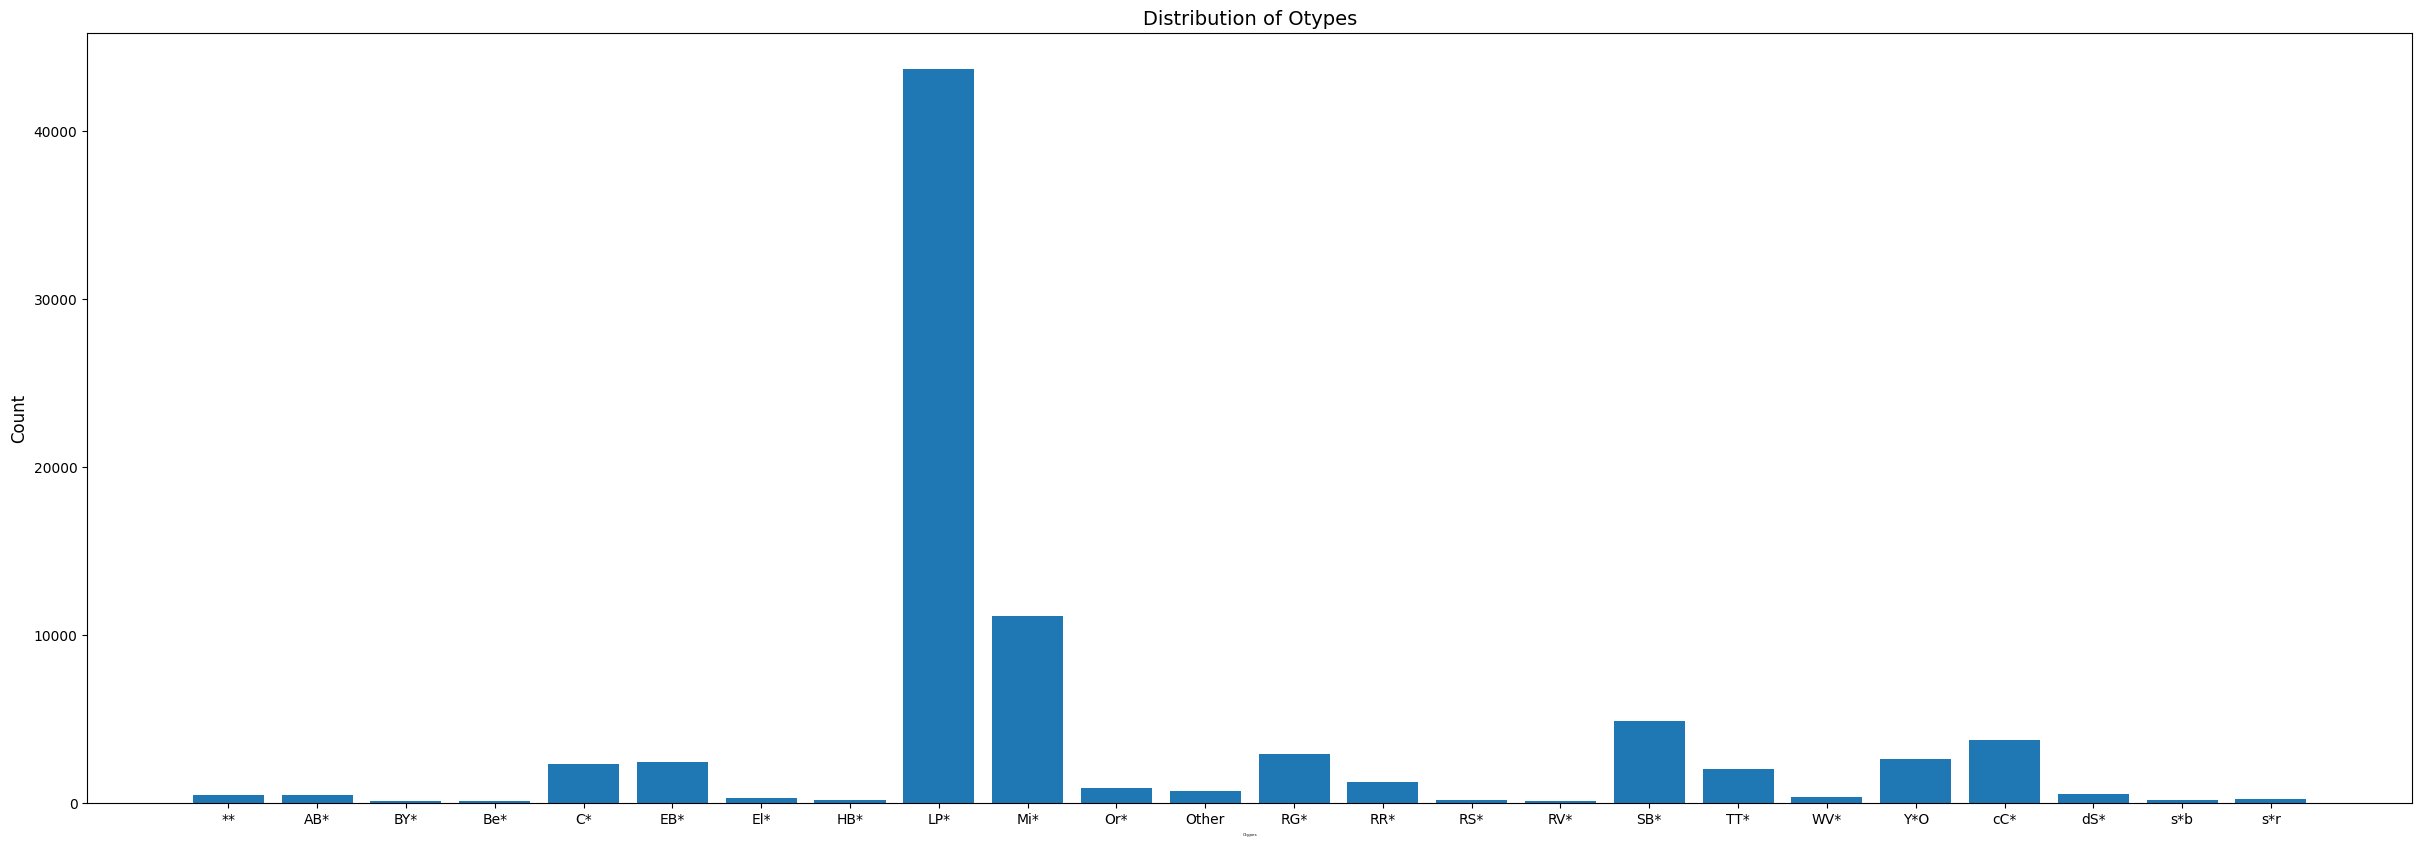

Epoch 1/200
1529/1529 [==============================] - 2s 1ms/step - loss: 0.9144 - accuracy: 0.7391 - val_loss: 0.7433 - val_accuracy: 0.7713
Epoch 2/200
1529/1529 [==============================] - 2s 1ms/step - loss: 0.6688 - accuracy: 0.7945 - val_loss: 0.6877 - val_accuracy: 0.7847
Epoch 3/200
1529/1529 [==============================] - 2s 1ms/step - loss: 0.6209 - accuracy: 0.8090 - val_loss: 0.6166 - val_accuracy: 0.8098
Epoch 4/200
1529/1529 [==============================] - 2s 1ms/step - loss: 0.5892 - accuracy: 0.8171 - val_loss: 0.6136 - val_accuracy: 0.8067
Epoch 5/200
1529/1529 [==============================] - 2s 1ms/step - loss: 0.5653 - accuracy: 0.8234 - val_loss: 0.5925 - val_accuracy: 0.8184
Epoch 6/200
1529/1529 [==============================] - 2s 1ms/step - loss: 0.5465 - accuracy: 0.8292 - val_loss: 0.5758 - val_accuracy: 0.8228
Epoch 7/200
1529/1529 [==============================] - 2s 1ms/step - loss: 0.5335 - accuracy: 0.8328 - val_loss: 0.5484 - val_ac

In [56]:
# Load the data
Withbinaries = np.load("Withbinaries.npy", allow_pickle=True)

# min count of a specific otype
mincounts = 100

# Get the unique "otypes" values and their counts
otypes, counts = np.unique(Withbinaries[:, -1], return_counts=True)

# Make rare "otype" values "Other"
Withbinaries = makerareother(Withbinaries, otypes, counts, mincounts)

# Split the data into features and labels
X = Withbinaries[:, 1:-1]  # All columns except the last one
y = Withbinaries[:, -1]   # The last column
ypreencode = y
# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))
ypostencode = y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(40, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(40, activation='relu'),
    Dense(len(np.unique(ypreencode)), activation='softmax')  # len(np.unique(ypreencode)) is number of output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Save the model
model.save("star_classifier_withbin.keras")

In [57]:
len(np.unique(ypreencode))

24

In [58]:
# Load the model
model = tf.keras.models.load_model("star_classifier_withbin.keras")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the predicted one-hot encoded labels back to their original form
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compare the predicted labels with the actual labels
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

638/638 [==============================] - 1s 856us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.14      0.18       109
           1       0.73      0.20      0.31       123
           2       0.00      0.00      0.00        21
           3       0.30      0.24      0.27        25
           4       0.81      0.64      0.72       626
           5       0.58      0.51      0.54       630
           6       0.39      0.10      0.16        67
           7       0.61      0.51      0.55        45
           8       0.92      0.98      0.95     10855
           9       0.94      0.90      0.92      2775
          10       0.47      0.39      0.42       246
          11       0.55      0.30      0.39       181
          12       0.82      0.58      0.68       726
          13       0.84      0.76      0.80       292
          14       0.22      0.15      0.18        40
          15       0.50      0.52      0.51        33
 

638/638 [==============================] - 1s 962us/step


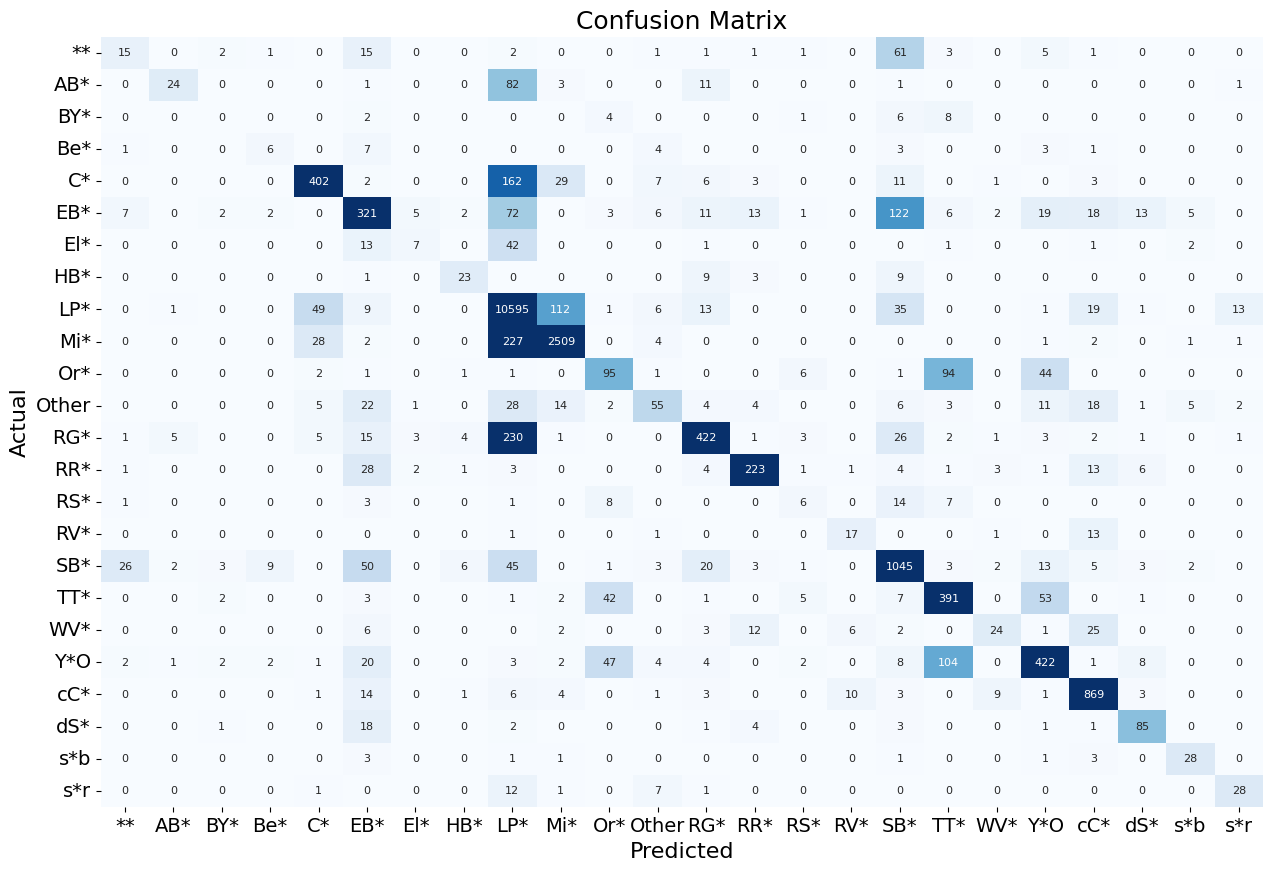

In [59]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Plot confusion matrix with larger size and label names
label_names = np.unique(ypreencode)
plt.figure(figsize=(15, 10))  # Set the figure size
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes, labels=np.arange(len(np.unique(ypreencode))))
sns.heatmap(conf_matrix, annot=True, fmt='d', vmin=0, vmax=200, cmap='Blues', cbar=False, annot_kws={"size": 8},
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Confusion Matrix Take 1')
plt.show()